In [1]:
from aux_functions import *

In [2]:
# training image pathnames for glob
car_pathname = "training/vehicles/**/*.png"
non_car_pathname = "training/non-vehicles/**/*.png"

# extract pathnames of training images
cars = glob.glob(car_pathname, recursive=True)
non_cars = glob.glob(non_car_pathname, recursive=True)

In [3]:
def trainSVC(pos_examples, neg_examples, hog_channel=[0,1,2], cspace='GRAY', savename=''):
    # time stamp before feature extraction
    t1 = time.time()

    # extracting HOG features of cars and non-cars
    print('SVM: using {} positive and {} negative examples'.format(len(pos_examples), len(neg_examples)))
    print('SVM: extracting features...')
    if cspace is 'GRAY':
        pos_features = hog_from_file_gray(pos_examples, gaussian_blur=True)
        neg_features = hog_from_file_gray(neg_examples, gaussian_blur=True)

    else:
        pos_features = hog_from_file(pos_examples, hog_channel=hog_channel, cspace=cspace)
        neg_features = hog_from_file(neg_examples, hog_channel=hog_channel, cspace=cspace)

    # feature vectors stack
    X = np.vstack((pos_features, neg_features)).astype(np.float64)
    # feature normalize
    print('SVM: normalizing features...')
    X_scaler = StandardScaler().fit(X)
    # apply normalization to X
    scaled_X = X_scaler.transform(X)
    
    # reduce features with pca
    pca = decomposition.PCA(n_components=1000)
    pca.fit(scaled_X)
    scaled_X = pca.transform(scaled_X)


    # labels vector
    y = np.hstack((np.ones(len(pos_features)), np.zeros(len(neg_features))))
    
    # time stamp after feature extraction
    t2 = time.time()
    print('{} seconds to create {} feature vectors of size {}'.format(round(t2-t1, 5),
                                                                      len(scaled_X), 
                                                                      len(scaled_X[0])))

    
    
    #--------------------------------------------------------------------------------------------------#
    
    
    
    # split training and test sets randomly
    print('SVM: splitting train/validation data...')
    rand_state = np.random.randint(0,100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=rand_state)

    # create linear svc object
    print('SVM: Training model...')
    svc = LinearSVC()

    # create time stamps before and after training
    t1 = time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t1, 2), 'Seconds to train SVM...')
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    
    print('SVM: Saving model...')
    joblib.dump(svc, 'svm_'+savename+'.pkl')
    print('svm_'+savename+'.pkl saved.')
    joblib.dump(X_scaler, 'svm_scaler_'+savename+'.pkl')
    print('svm_scaler_'+savename+'.pkl saved.')
    joblib.dump(pca, 'svm_pca_'+savename+'.pkl')
    print('svm_pca_'+savename+'.pkl saved.')
    print('Done.')
    
    return svc, X_scaler, X_test, y_test

In [4]:
svc, scaler_X, X_test, y_test = trainSVC(cars, non_cars, cspace='GRAY',savename='blurred')

SVM: using 8792 positive and 8968 negative examples
SVM: extracting features...
SVM: normalizing features...
94.40169 seconds to create 17760 feature vectors of size 1000
SVM: splitting train/validation data...
SVM: Training model...
5.62 Seconds to train SVM...
Test Accuracy of SVC =  0.9499
SVM: Saving model...
svm_blurred.pkl saved.
svm_scaler_blurred.pkl saved.
svm_pca_blurred.pkl saved.
Done.


In [5]:
# check the score of SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# check the prediction time for a single sample
t=time.time()
numb_predict = 15
print('SVC predicts: ', svc.predict(X_test[0:numb_predict]))
print('Labels        ', y_test[0:numb_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', numb_predict,'labels with SVC')

Test Accuracy of SVC =  0.9499
SVC predicts:  [ 0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.]
Labels         [ 0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.]
0.01651 Seconds to predict 15 labels with SVC


In [3]:
test = cv2.imread('test_images/test1.jpg')
patch = test[0:64,0:64,0]
feat0 = np.ravel(hog_short(patch))
print(feat0.shape)

(1764,)


(1764,)


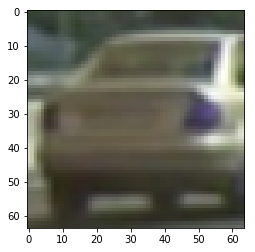

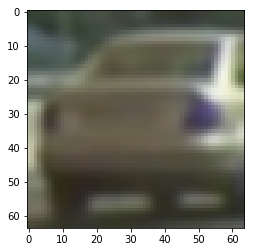

In [7]:
test = cv2.imread('image0009.png')
patch = test[0:64,0:64,0]
feat0 = np.ravel(hog_short(patch))
print(feat0.shape)
plt.imshow(test)
plt.show()
blur = cv2.GaussianBlur(test, (5,5), sigmaX=0)
plt.imshow(blur)
plt.show()